In [1]:
# Set the seed value for the notebook so the results are reproducible
from numpy.random import seed
seed(1)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd

In [3]:
df=pd.read_csv('resources/movies_cleaned.csv')

In [4]:
df=df[["gross","runtime","ROI_pct"]]

In [5]:
df["ROI_pct"]=df["ROI_pct"].astype("int")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4638 entries, 0 to 4637
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   gross    4638 non-null   int64
 1   runtime  4638 non-null   int64
 2   ROI_pct  4638 non-null   int32
dtypes: int32(1), int64(2)
memory usage: 90.7 KB


In [6]:
df.head()

,gross,runtime,ROI_pct
0,52287414,89,553
1,70136369,103,1068
2,179800601,110,1098
3,85160248,137,360
4,18564613,90,106


In [7]:
X = df[["gross", "runtime"]].values
y = df["ROI_pct"].values
print(X.shape)
print(y.shape)

(4638, 2)
(4638,)


In [8]:
X

array([[ 52287414,        89],
       [ 70136369,       103],
       [179800601,       110],
       ...,
       [ 19985196,        92],
       [ 36874745,       107],
       [  3775000,        76]], dtype=int64)

In [9]:
y

array([ 553, 1068, 1098, ...,  135,   84,    7])

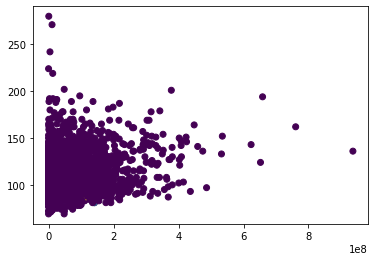

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [11]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train

array([[   200399,       107],
       [128012934,       138],
       [ 11956207,       101],
       ...,
       [  7690013,        96],
       [ 15322921,       123],
       [   671382,        85]], dtype=int64)

In [12]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

X_train

array([[   200399,       107],
       [128012934,       138],
       [ 11956207,       101],
       ...,
       [  7690013,        96],
       [ 15322921,       123],
       [   671382,        85]], dtype=int64)

In [13]:
# Transform the training and testing data using the X_scaler

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_train_scaled

array([[-0.69351719, -0.04705759],
       [ 1.24796285,  1.64981698],
       [-0.51494576, -0.37548492],
       ...,
       [-0.57974951, -0.64917437],
       [-0.46380518,  0.82874864],
       [-0.68636293, -1.25129116]])

In [14]:
# # One-hot encoding
# y_train_categorical = to_categorical(y_train)
# y_test_categorical = to_categorical(y_test)
# y_train_categorical.shape

In [15]:
# first, create a normal neural network with 2 inputs, 6 hidden nodes, and 2 outputs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=2))
model.add(Dense(units=2, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 18        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 14        
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Compile the model
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [22]:
X_train_scaled

array([[-0.69351719, -0.04705759],
       [ 1.24796285,  1.64981698],
       [-0.51494576, -0.37548492],
       ...,
       [-0.57974951, -0.64917437],
       [-0.46380518,  0.82874864],
       [-0.68636293, -1.25129116]])

In [23]:
y_train.shape

(3478,)

In [24]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
109/109 - 0s - loss: 165738448.0000 - accuracy: 0.0069
Epoch 2/100
109/109 - 0s - loss: 165738464.0000 - accuracy: 0.0049
Epoch 3/100
109/109 - 0s - loss: 165738432.0000 - accuracy: 0.0046
Epoch 4/100
109/109 - 0s - loss: 165738464.0000 - accuracy: 0.0049
Epoch 5/100
109/109 - 0s - loss: 165738448.0000 - accuracy: 0.0049
Epoch 6/100
109/109 - 0s - loss: 165738400.0000 - accuracy: 0.0063
Epoch 7/100
109/109 - 0s - loss: 165738512.0000 - accuracy: 0.0060
Epoch 8/100
109/109 - 0s - loss: 165738432.0000 - accuracy: 0.0060
Epoch 9/100
109/109 - 0s - loss: 165738432.0000 - accuracy: 0.0063
Epoch 10/100
109/109 - 0s - loss: 165738448.0000 - accuracy: 0.0060
Epoch 11/100
109/109 - 0s - loss: 165738464.0000 - accuracy: 0.0063
Epoch 12/100
109/109 - 0s - loss: 165738432.0000 - accuracy: 0.0060
Epoch 13/100
109/109 - 0s - loss: 165738496.0000 - accuracy: 0.0058
Epoch 14/100
109/109 - 0s - loss: 165738544.0000 - accuracy: 0.0055
Epoch 15/100
109/109 - 0s - loss: 165738496.0000 - accura

In [26]:
# Evaluate the model using the testing data
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

37/37 - 0s - loss: 220754.4062 - accuracy: 0.0112
Loss: 220754.40625, Accuracy: 0.011206896975636482


In [27]:
# import numpy as np
# new_data = np.array([[0.2, 0.3, 0.4]])
# print(f"Predicted class: {model.predict_classes(new_data)}")

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


ValueError: in user code:

    C:\Users\berry\anaconda3\envs\machine_learning\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\berry\anaconda3\envs\machine_learning\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\berry\anaconda3\envs\machine_learning\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\berry\anaconda3\envs\machine_learning\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\berry\anaconda3\envs\machine_learning\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\berry\anaconda3\envs\machine_learning\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Users\berry\anaconda3\envs\machine_learning\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Users\berry\anaconda3\envs\machine_learning\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\berry\anaconda3\envs\machine_learning\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 2 but received input with shape [None, 3]
